In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Data loading - CSV

In [4]:
colsname = ['x', 'y', 'z', 'xn', 'yn', 'zn', 'R', 'G', 'B', 'A', 'quality', 'zz']
lidar = pd.read_csv('../data/20180911_SHCCurb3.ply',
                    delimiter=' ',
                    skiprows=18,
                    #nrows=500000, #use None to read the complete dataset or the number of first rows to read
                    header=None,
                    #error_bad_lines=False,
                    #keep_default_na=False,
                    #dtype={0:'float', 1:'float', 2:'float', 3:'float', 4:'int', 5:'int', 6:'int'},
                    #skipfooter=20, engine='python',
                    #
                    )
lidar.columns=colsname
lidar.drop(['zz'], inplace=True, axis=1)
lidar.head()

,x,y,z,xn,yn,zn,R,G,B,A,quality
0,6.531357,-6.797287,-2.386337,0.035693,-0.037846,0.998646,121,142,104,255,0.193973
1,6.504440,-6.783005,-2.385269,0.044266,-0.033033,0.998474,87,106,78,255,0.188113
2,6.539658,-6.819748,-2.388138,0.050499,-0.032237,0.998204,130,147,110,255,0.190311
3,6.489365,-6.780930,-2.385605,0.051617,-0.021600,0.998433,92,113,81,255,0.195926
4,6.523087,-6.816177,-2.387894,0.046914,-0.039101,0.998133,114,133,97,255,0.185672


## convert coordinates from cartesian to spherical
https://stackoverflow.com/questions/4116658/faster-numpy-cartesian-to-spherical-coordinate-conversion/4116803#4116803

In [5]:
def appendSpherical_np(xyz):
    ptsnew = np.hstack((xyz, np.zeros(xyz.shape)))
    xy = xyz[:,0]**2 + xyz[:,1]**2
    ptsnew[:,3] = np.sqrt(xy + xyz[:,2]**2)
    ptsnew[:,4] = np.arctan2(np.sqrt(xy), xyz[:,2]) # theta
    ptsnew[:,5] = np.arctan2(xyz[:,1], xyz[:,0])  # phi
    return ptsnew

In [6]:
zz = appendSpherical_np(lidar[['x', 'y', 'z']].values)
zz#[:,:2]

array([[  6.531357  ,  -6.797287  ,  -2.386337  ,   9.72400839,
          1.81873555,  -0.80534728],
       [  6.50444   ,  -6.783005  ,  -2.385269  ,   9.69569001,
          1.81936134,  -0.80635962],
       [  6.539658  ,  -6.819748  ,  -2.388138  ,   9.74573202,
          1.81836192,  -0.80636084],
       ...,
       [  3.641129  , -10.93468   ,  -2.161697  ,  11.72595331,
          1.75620833,  -1.24935564],
       [  3.66304   , -11.0005    ,  -2.162582  ,  11.79430469,
          1.75519777,  -1.24935615],
       [  3.685867  , -11.06905   ,  -2.164108  ,  11.86561616,
          1.75420771,  -1.2493561 ]])

In [6]:
spherical = pd.DataFrame(appendSpherical_np(lidar[['x', 'y', 'z']].values)[:,3:], columns=['distance', 'theta', 'phi'])
dataset = pd.concat([lidar, spherical], axis=1)
dataset.head()

,x,y,z,xn,yn,zn,R,G,B,A,quality,distance,theta,phi
0,6.531357,-6.797287,-2.386337,0.035693,-0.037846,0.998646,121,142,104,255,0.193973,9.724008,1.818736,-0.805347
1,6.504440,-6.783005,-2.385269,0.044266,-0.033033,0.998474,87,106,78,255,0.188113,9.695690,1.819361,-0.806360
2,6.539658,-6.819748,-2.388138,0.050499,-0.032237,0.998204,130,147,110,255,0.190311,9.745732,1.818362,-0.806361
3,6.489365,-6.780930,-2.385605,0.051617,-0.021600,0.998433,92,113,81,255,0.195926,9.684213,1.819698,-0.807366
4,6.523087,-6.816177,-2.387894,0.046914,-0.039101,0.998133,114,133,97,255,0.185672,9.732059,1.818691,-0.807367


In [7]:
dataset.describe()

,x,y,z,xn,yn,zn,R,G,B,A,quality,distance,theta,phi
count,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.000000,29183.0,29183.000000,29183.000000,29183.000000,29183.000000
mean,4.932356,-8.720809,-2.270046,0.036247,0.127371,0.925469,66.976836,74.691019,58.740739,255.0,0.203770,10.319128,1.795760,-1.054132
std,0.898344,1.196609,0.076286,0.057298,0.288633,0.198451,47.845634,55.350114,42.502612,0.0,0.051759,1.137550,0.028566,0.092776
min,3.398544,-11.132130,-2.464401,-0.737330,-0.172412,0.016637,1.000000,0.000000,0.000000,255.0,0.126833,7.931027,1.736049,-1.249364
25%,4.163605,-9.627823,-2.329056,0.023887,-0.023591,0.989550,27.000000,27.000000,23.000000,255.0,0.180789,9.474003,1.772146,-1.123095
50%,4.904037,-8.750076,-2.268173,0.050224,0.000033,0.997379,61.000000,66.000000,53.000000,255.0,0.192508,10.240850,1.797578,-1.058932
75%,5.689209,-7.674621,-2.204086,0.063133,0.112833,0.998382,105.000000,120.000000,92.000000,255.0,0.217899,11.163696,1.819034,-0.988773
max,6.580704,-6.780930,-2.090378,0.428332,0.999164,1.000000,228.000000,243.000000,207.000000,255.0,0.955459,13.073367,1.854466,-0.805347


# Camera class Pandas version

In [5]:
class Camera(): 
    def __init__(self, scene, focal=50, sqsensor=30, pixels=100):
        self.scene = scene
        self.focal = focal
        self.sqsensor = sqsensor
        self.pixels = pixels
        self.sphericacoord = ['distance', 'theta', 'phi'] #Fields MUST be in that order
        self.channels = ['R', 'G', 'B'] #, 'distance'
        
    def render(self, theta, phi):        
        #Blank Picture
        picture = np.zeros((self.pixels, self.pixels, len(self.channels)))
        
        # Calculation in theta direcion
        thetarange = np.arctan((self.sqsensor/2)/self.focal)
        phirange = np.arctan((self.sqsensor/2)/self.focal)
        thetamin = theta - thetarange/2
        phimin = phi - phirange/2
        
        # Calculation in theta direction
        for thetapixelnum in range(self.pixels):
            for phipixelnum in range(self.pixels):
                thetalow = thetamin + thetapixelnum * (thetarange/self.pixels)
                thetahigh = thetamin + (thetapixelnum+1) * (thetarange/self.pixels)
                philow = phimin + phipixelnum * (phirange/self.pixels)
                phihigh = phimin + (phipixelnum+1) * (phirange/self.pixels)
                
                mask = (self.scene[self.sphericacoord[1]] > thetalow) & (self.scene[self.sphericacoord[1]] < thetahigh) & (self.scene[self.sphericacoord[2]] > philow) & (self.scene[self.sphericacoord[2]] < phihigh)
                #print(mask)
                pixel = self.render_pixel(self.scene[mask])
                
                #Channel calculation
                for index, channel in enumerate(self.channels):
                    channelval = pixel[channel]
                    if channel in ['R', 'G', 'B']:
                        if not np.isnan(channelval):
                            channelval = int(channelval)/255
                            
                    #Channel value assignation
                    #print(channelval, (index, thetapixelnum, phipixelnum))
                    picture[(thetapixelnum, phipixelnum, index)] = channelval
                        
                #Distance calculation
                #picture[(3, thetapixelnum, phipixelnum)] = pixel['distance']
                
        return picture
    
    def render_pixel(self, pixel):
        columns = self.channels.copy()
        columns.append(self.sphericacoord[0])
        df = pixel[columns].mean()
        return df
    
camera = Camera(dataset)


In [ ]:
snapshot = camera.render(theta=1.795, phi=-1.05)
snapshot.shape

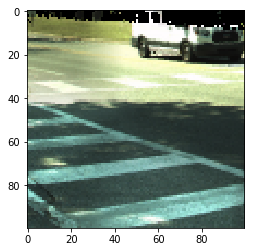

In [11]:
plt.figsize=(15,15)
plt.imshow(snapshot)
#plt.figsize=(15,15)
plt.show()

# Data loading - SQL

In [83]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:

# Create your connection.
cnx = sqlite3.connect('../db/lidar.sql')

dataset = pd.read_sql_query("SELECT dist, theta, phi, R, G, B FROM cloud WHERE scene=1", cnx)
dataset.head()


,dist,theta,phi,R,G,B
0,2.453244,2.355907,-0.222021,102,111,94
1,2.460084,2.353902,-0.222021,64,84,56
2,2.459836,2.352900,-0.222016,86,100,75
3,2.481330,2.350902,-0.222012,74,79,57
4,2.484241,2.348915,-0.222013,81,91,67


In [104]:
dataset.describe()

,dist,theta,phi,R,G,B
count,7.171758e+06,7.171758e+06,7.171758e+06,7.171758e+06,7.171758e+06,7.171758e+06
mean,1.330127e+01,1.721785e+00,1.528950e-01,1.070933e+02,1.124221e+02,8.150790e+01
std,1.790438e+01,4.180802e-01,1.876591e+00,6.357712e+01,6.259947e+01,5.284542e+01
min,1.405640e+00,7.842690e-01,-3.141367e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.563849e+00,1.407803e+00,-1.337750e+00,6.100000e+01,6.500000e+01,4.300000e+01
50%,6.061144e+00,1.781213e+00,5.002076e-02,8.900000e+01,9.800000e+01,6.800000e+01
75%,1.425304e+01,2.069346e+00,1.952576e+00,1.390000e+02,1.480000e+02,1.040000e+02
max,3.001383e+02,2.360223e+00,3.141355e+00,2.550000e+02,2.550000e+02,2.550000e+02


In [22]:
conold = sqlite3.connect('../db/lidar.sql')
cursold = conold.cursor()

#cursold.fetchall()

slidar = sqlite3.connect(":memory:")
curs = slidar.cursor()
curs.executescript("""CREATE TABLE IF NOT EXISTS cloud (
                            id integer PRIMARY KEY,
                            dist REAL,
                            theta REAL,
                            phi REAL,
                            R INTEGER,
                            G INTEGER,
                            B INTEGER
                            );""")
slidar.commit()
data = cursold.execute("SELECT id, dist, theta, phi, R, G, B FROM cloud WHERE scene=1;")
curs.executemany('INSERT INTO cloud VALUES (?,?,?,?,?,?,?);', data.fetchall())
slidar.commit()

In [26]:
#data = curs.execute("SELECT dist, theta, phi, R, G, B FROM cloud;")
data = curs.execute("SELECT COUNT(*) FROM cloud;")
data.fetchone()

(7171758,)

[]

In [24]:
import gc
gc.collect()

0

In [18]:
# https://stackoverflow.com/questions/6677540/how-do-i-dump-a-single-sqlite3-table-in-python

In [243]:
class CameraSQL(): 
    def __init__(self, db, focal=50, sqsensor=30, pixels=100):
        self.db = db
        self.curs = self.db.cursor()
        self.focal = focal
        self.sqsensor = sqsensor
        self.pixels = pixels
        self.channels = ['R', 'G', 'B', 'dist', 'theta']
        
        data = self.curs.execute("SELECT COUNT(*) FROM cloud;")
        pointcount = data.fetchone()[0]
        print('{} points in the initial dataset'.format(pointcount))
        
    
    def render(self, theta, phi):        
        #Blank Picture
        picture = np.zeros((self.pixels, self.pixels, len(self.channels)))
        
        # Calculation in theta direcion
        thetarange = np.arctan((self.sqsensor/2)/self.focal)
        phirange = np.arctan((self.sqsensor/2)/self.focal)
        thetamin = theta - thetarange/2
        thetamax = theta + thetarange/2
        phimin = phi - phirange/2
        phimax = phi + phirange/2
        
        # Calculation in theta direction
        
        ## Smaller datatable creation
        self.curs.execute('DROP TABLE IF EXISTS picture;')
        self.db.commit()
        sqlreq = 'CREATE TABLE picture AS SELECT * FROM cloud WHERE theta > {} AND theta < {} AND phi > {} AND phi < {};'.format(thetamin, thetamax, phimin, phimax)
        self.curs.execute(sqlreq)
        self.db.commit()
        
        data = self.curs.execute("SELECT COUNT(*) FROM picture;")
        pointcount = data.fetchone()[0]
        #print('{} points in the picture'.format(pointcount))
        
        for thetapixelnum in range(self.pixels):
            thetalow = thetamin + thetapixelnum * (thetarange/self.pixels)
            thetahigh = thetamin + (thetapixelnum+1) * (thetarange/self.pixels)
            
            self.curs.execute('DROP TABLE IF EXISTS temp1;')
            self.db.commit()
            sqlreq = 'CREATE TABLE temp1 AS SELECT * FROM picture WHERE theta > {} AND theta < {};'.format(thetalow, thetahigh)
            self.curs.execute(sqlreq)
            self.db.commit()
            
            for phipixelnum in range(self.pixels):

                philow = phimin + phipixelnum * (phirange/self.pixels)
                phihigh = phimin + (phipixelnum+1) * (phirange/self.pixels)
                
                self.curs.execute('DROP TABLE IF EXISTS temp2;')
                self.db.commit()
                sqlreq = 'CREATE TABLE temp2 AS SELECT * FROM temp1 WHERE phi > {} AND phi < {};'.format(philow, phihigh)
                self.curs.execute(sqlreq)
                self.db.commit()
                
                #Channel calculation
                for index, channel in enumerate(self.channels):
                    data = self.curs.execute('SELECT AVG({}) FROM temp2'.format(channel))
                    channelval = data.fetchone()[0]
                    # Value adjustment for color channel
                    if channel in ['R', 'G', 'B'] and channelval is not None:
                        channelval = channelval/255
                    #Channel value assignation
                    picture[(thetapixelnum, phipixelnum, index)] = channelval
        
        picture = self.appendpixel_coord(picture)
        #picture =self.appendcolor(picture)
        return picture
    
    def appendpixel_coord(self, mat):
        ptsnew = np.concatenate((mat, np.zeros((mat.shape[0], mat.shape[1], 2))), axis=2)
        # X calculation
        ptsnew[:,:,5] = ptsnew[:,:,3] * np.sin(ptsnew[:,:,4])
        # Y calculation
        ptsnew[:,:,6] = ptsnew[:,:,3] * np.cos(ptsnew[:,:,4])
        return ptsnew
    
    def appendcolor(self,mat):
        ptsnew = np.concatenate((mat, np.zeros((mat.shape[0], mat.shape[1], 1))), axis=2)
        # RGG calculation
        ptsnew[:,:,7] = '#' + '{0:02x}'.format(mat[:,:,0]) + '{0:02x}'.format(mat[:,:,1]) + '{0:02x}'.format(mat[:,:,2])
        return ptsnew


    
camerasql = CameraSQL(slidar)


7171758 points in the initial dataset


In [244]:
snapshot = camerasql.render(theta=1.721785, phi=-.1528950)
snapshot.shape

(100, 100, 7)

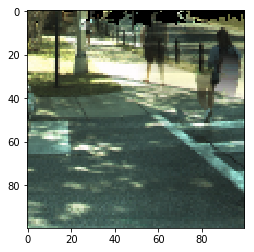

In [245]:

plt.imshow(snapshot[:,:,:3])
plt.figsize=(15,15)
plt.show()

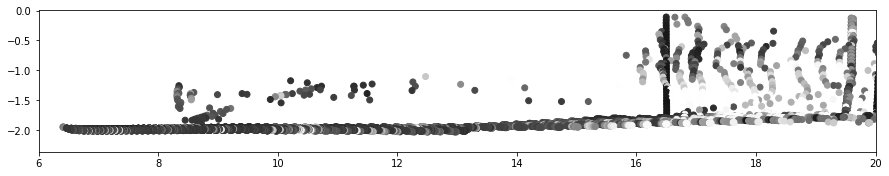

In [246]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
reds   = [int(x*255) if not np.isnan(x) else 0 for x in snapshot[:,:,0].reshape(-1)]
greens = [int(x*255) if not np.isnan(x) else 0 for x in snapshot[:,:,1].reshape(-1)]
blues  = [int(x*255) if not np.isnan(x) else 0 for x in snapshot[:,:,2].reshape(-1)]
colors = ['#{0:02x}{0:02x}{0:02x}'.format(r,g,b) for r,g,b in zip(reds, greens, blues)]
ax.scatter(x=snapshot[:,:,5].reshape(-1), y=snapshot[:,:,6].reshape(-1), c=colors)
ax.set_aspect('equal')
ax.set_xlim((6,20))
plt.show()

In [202]:
snapshot.shape

(50, 50, 7)

In [188]:
def appendpixel_coord(mat):
    ptsnew = np.concatenate((mat, np.zeros((mat.shape[0], mat.shape[1], 2))), axis=2)
    # X calculation
    ptsnew[:,4] = ptsnew[:,4] * np.sin(ptsnew[:,5])
    # Y calculation
    ptsnew[:,5] = ptsnew[:,4] * np.cos(ptsnew[:,5])
    return ptsnew
appendpixel_coord(snapshot).shape

(50, 50, 7)

In [177]:
snapshot.shape

(50, 50, 4)

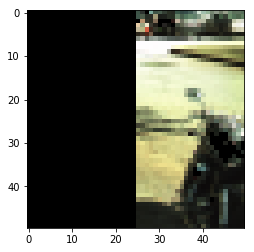

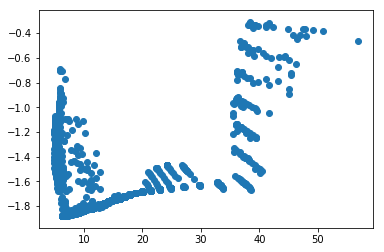

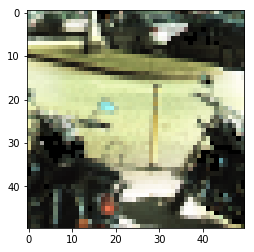

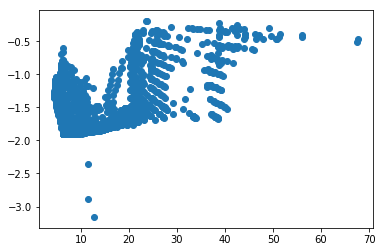

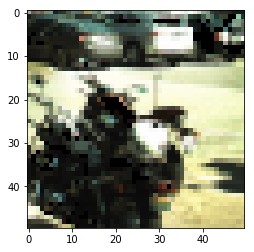

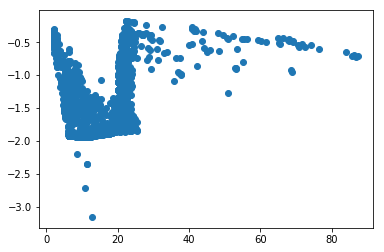

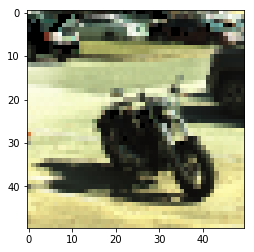

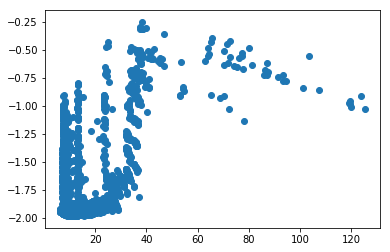

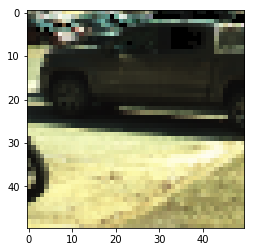

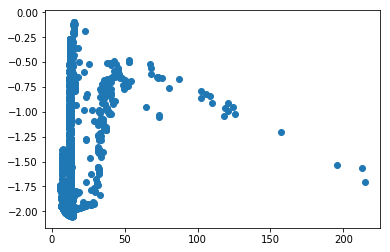

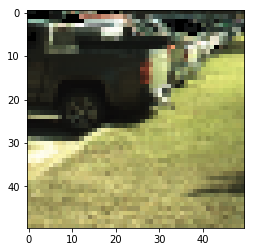

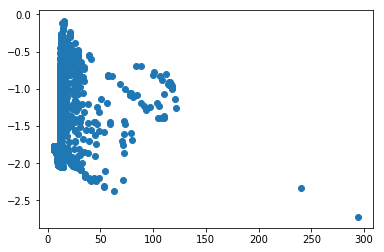

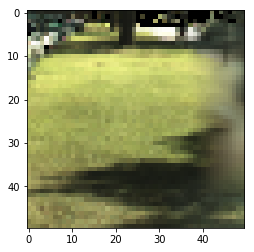

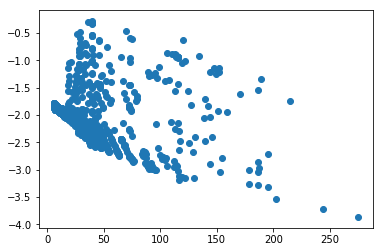

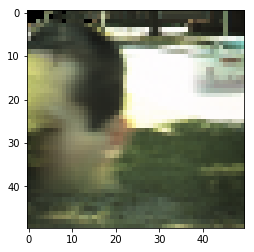

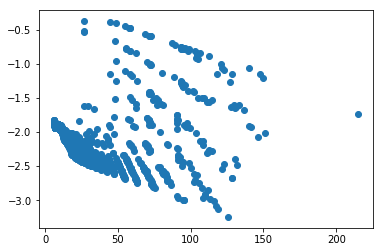

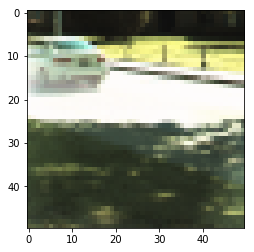

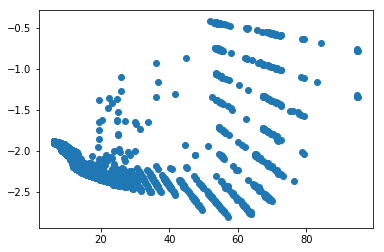

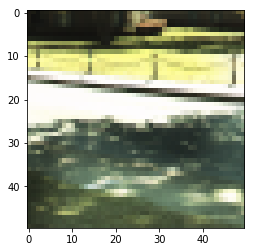

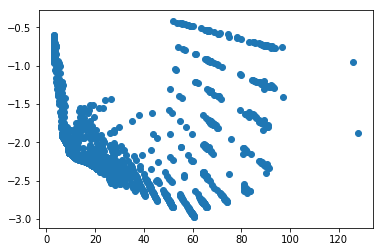

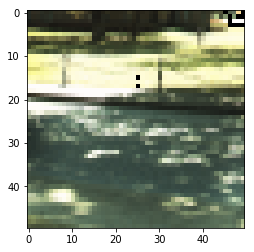

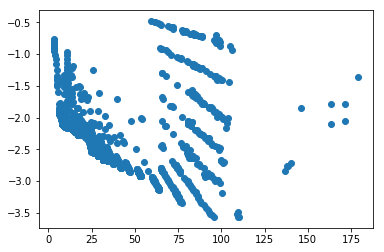

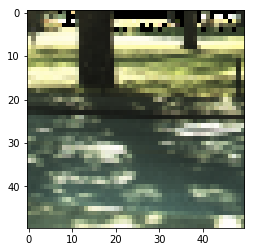

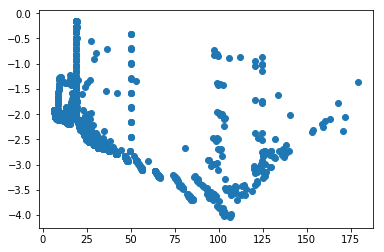

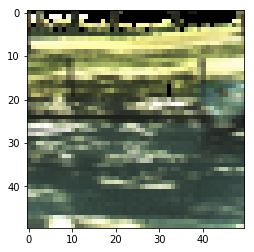

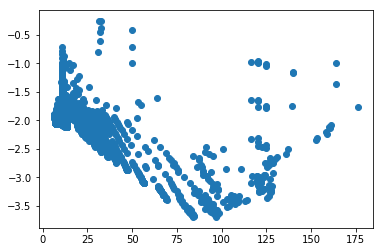

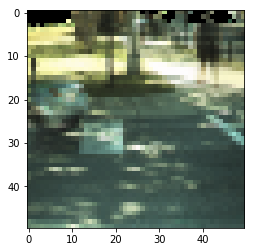

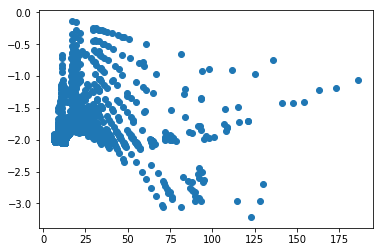

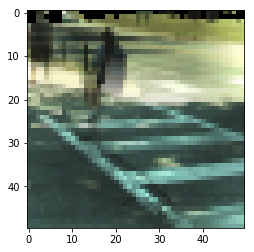

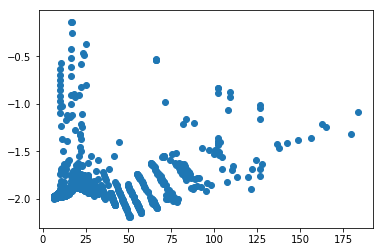

In [212]:
for phi in np.linspace(dataset['phi'].min(),0 ,15):
    snapshot = camerasql.render(theta=1.721785, phi=phi)
    
    plt.imshow(snapshot[:,:,:3])
    plt.figsize=(15,15)
    plt.show()
    plt.scatter(x=snapshot[:,:,5].reshape(-1), y=snapshot[:,:,6].reshape(-1))
    plt.show()

In [122]:
dataset['phi'].min()+.25


-3.1413674234064253